# Proyecto del Día 18 - Analizar una Base de Datos de Perros

Hoy vamos a realizar un proyecto muy entretenido, que consiste en conseguir un dataset sobre razas de perros, que se encuentra alojada en el sitio [The Dog Api](https://thedogapi.com/).

Tu misión consiste en lograr obtener un dataset que contiene información sobre razas de perro ("breeds"), y crear visualizaciones que permitan responder algunas preguntas sobre la **expectativa de vida**, y el **temperamento** más frecuente entre todas las **razas**.


### Preguntas a responder
1. ¿Cuál es la esperanza de vida (en años) más frecuente entre todas las razas de perro?
2. ¿Cuál es el temperamento más frecuente entre todas las razas de perros?


### Pasos sugeridos para llegar hasta la respuesta
1. Descarga las **librerías** necesarias.
2. Explora el sitio [https://thedogapi.com/](https://thedogapi.com/) para identificar dónde y cómo se describe el funcionamiento de su API. Identifica la **API específica** con información sobre **razas** ("breeds"). Una vez que lo hagas, implementa la API y guarda esos datos en un **DataFrame** de Pandas.
*Nota: como todo sitio nuevo al que enfrentes, deberás resolver desafíos particulares. En este caso presta atención a las instrucciones que mencionan algo sobre cómo usar los mismos protocolos que se utilizan en la API de gatos de la misma organización*.
3. Realiza un **análisis exploratorio** para conocer la estrucutra y calidad de tus datos.
4. Implementa la **limpieza de datos** que consideres necesaria.
5. Crea los **gráficos** que creas necesarios para poder visualizar con claridad la respuesta a las preguntas.

Te deseo mucho aprendizaje, pero sobre todo, mucha diversión.
¡Adelante!

## 1. Descarga las librerías necesarias.

In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Explora el sitio https://thedogapi.com/ para identificar dónde y cómo se describe el funcionamiento de su API. 
Identifica la API específica con información sobre razas ("breeds"). Una vez que lo hagas, implementa la API y guarda esos datos en un DataFrame de Pandas. Nota: como todo sitio nuevo al que enfrentes, deberás resolver desafíos particulares. En este caso presta atención a las instrucciones que mencionan algo sobre cómo usar los mismos protocolos que se utilizan en la API de gatos de la misma organización.

In [4]:
url = 'https://api.thedogapi.com/v1/breeds'
# Cada raza tiene un identificador único de 4 caracteres que se puede usar para filtrar una búsqueda. Este breed.id está disponible enumerando 
# todas las razas a través de https://api.thecatapi.com/v1/breeds Y LO CAMBIE POR THE DOG
respuesta = requests.get(url)
data = respuesta.json()

In [5]:
df = pd.DataFrame(data)
df.head()

,weight,height,id,name,bred_for,breed_group,life_span,temperament,origin,reference_image_id,country_code,description,history
0,"{'imperial': '6 - 13', 'metric': '3 - 6'}","{'imperial': '9 - 11.5', 'metric': '23 - 29'}",1,Affenpinscher,"Small rodent hunting, lapdog",Toy,10 - 12 years,"Stubborn, Curious, Playful, Adventurous, Activ...","Germany, France",BJa4kxc4X,NaN,NaN,NaN
1,"{'imperial': '50 - 60', 'metric': '23 - 27'}","{'imperial': '25 - 27', 'metric': '64 - 69'}",2,Afghan Hound,Coursing and hunting,Hound,10 - 13 years,"Aloof, Clownish, Dignified, Independent, Happy","Afghanistan, Iran, Pakistan",hMyT4CDXR,AG,NaN,NaN
2,"{'imperial': '44 - 66', 'metric': '20 - 30'}","{'imperial': '30', 'metric': '76'}",3,African Hunting Dog,A wild pack animal,NaN,11 years,"Wild, Hardworking, Dutiful",,rkiByec47,NaN,NaN,NaN
3,"{'imperial': '40 - 65', 'metric': '18 - 29'}","{'imperial': '21 - 23', 'metric': '53 - 58'}",4,Airedale Terrier,"Badger, otter hunting",Terrier,10 - 13 years,"Outgoing, Friendly, Alert, Confident, Intellig...","United Kingdom, England",1-7cgoZSh,NaN,NaN,NaN
4,"{'imperial': '90 - 120', 'metric': '41 - 54'}","{'imperial': '28 - 34', 'metric': '71 - 86'}",5,Akbash Dog,Sheep guarding,Working,10 - 12 years,"Loyal, Independent, Intelligent, Brave",,26pHT3Qk7,NaN,NaN,NaN


## 3. Realiza un análisis exploratorio para conocer la estrucutra y calidad de tus datos.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   weight              172 non-null    object
 1   height              172 non-null    object
 2   id                  172 non-null    int64 
 3   name                172 non-null    object
 4   bred_for            151 non-null    object
 5   breed_group         156 non-null    object
 6   life_span           172 non-null    object
 7   temperament         168 non-null    object
 8   origin              5 non-null      object
 9   reference_image_id  172 non-null    object
 10  country_code        12 non-null     object
 11  description         1 non-null      object
 12  history             2 non-null      object
dtypes: int64(1), object(12)
memory usage: 17.6+ KB


In [7]:
df.describe()

,id
count,172.000000
mean,125.505814
std,81.121200
min,1.000000
25%,53.750000
50%,120.500000
75%,201.750000
max,264.000000


In [8]:
df.isnull().sum()

weight                  0
height                  0
id                      0
name                    0
bred_for               21
breed_group            16
life_span               0
temperament             4
origin                167
reference_image_id      0
country_code          160
description           171
history               170
dtype: int64

In [10]:
null_temperament = df[df['temperament'].isnull()]
null_temperament

,weight,height,id,name,bred_for,breed_group,life_span,temperament,origin,reference_image_id,country_code,description,history
126,"{'imperial': '15 - 17', 'metric': '7 - 8'}","{'imperial': '11 - 15', 'metric': '28 - 38'}",196,Poodle (Miniature),NaN,NaN,12 – 15 years,NaN,NaN,Hkxk4ecVX,NaN,NaN,NaN
127,"{'imperial': '6 - 9', 'metric': '3 - 4'}","{'imperial': '9 - 11', 'metric': '23 - 28'}",197,Poodle (Toy),NaN,NaN,18 years,NaN,NaN,rJFJVxc4m,NaN,NaN,NaN
135,"{'imperial': '3 - 6', 'metric': '1 - 3'}","{'imperial': '7.5 - 10.5', 'metric': '19 - 27'}",211,Russian Toy,NaN,Toy,10 - 12 years,NaN,NaN,HkP7Vxc4Q,NaN,NaN,NaN
169,"{'imperial': '45 - 65', 'metric': '20 - 29'}","{'imperial': '21.5 - 25', 'metric': '55 - 64'}",261,Wirehaired Vizsla,NaN,Sporting,12 - 14 years,NaN,NaN,r1I4hl5Em,NaN,NaN,NaN


## 4. Implementa la limpieza de datos que consideres necesaria.

In [11]:
# Eliminar columnas con más de 100 valores nulos
df = df.drop(columns=df.columns[df.isnull().sum() > 100])

# Verificar el resultado
print(df.isnull().sum())

weight                 0
height                 0
id                     0
name                   0
bred_for              21
breed_group           16
life_span              0
temperament            4
reference_image_id     0
dtype: int64


In [12]:
# seleccionar solo el primer número para la columna 'life_span'
numeros = []
for span in df['life_span']:
    numero = int(span.split()[0])
    numeros.append(numero)

df['life_span'] = numeros

In [13]:
# dejar solamente las columnas que necesitaremos para nuestras visualizaciones
columnas_de_interes = ["life_span", "temperament"]
df = df[columnas_de_interes]
df

,life_span,temperament
0,10,"Stubborn, Curious, Playful, Adventurous, Activ..."
1,10,"Aloof, Clownish, Dignified, Independent, Happy"
2,11,"Wild, Hardworking, Dutiful"
3,10,"Outgoing, Friendly, Alert, Confident, Intellig..."
4,10,"Loyal, Independent, Intelligent, Brave"
...,...,...
167,13,"Fearless, Friendly, Bold, Keen, Alert, Quick"
168,12,"Loyal, Gentle, Vigilant, Trainable, Proud"
169,12,NaN
170,12,"Cheerful, Alert, Companionable, Intelligent, P..."


In [19]:
df['temperament'] = df['temperament'].fillna('Desconocido')

# 5. Crea los gráficos que creas necesarios para poder visualizar con claridad la respuesta a las preguntas.

#### ¿Cuál es la esperanza de vida (en años) más frecuente entre todas las razas de perro?

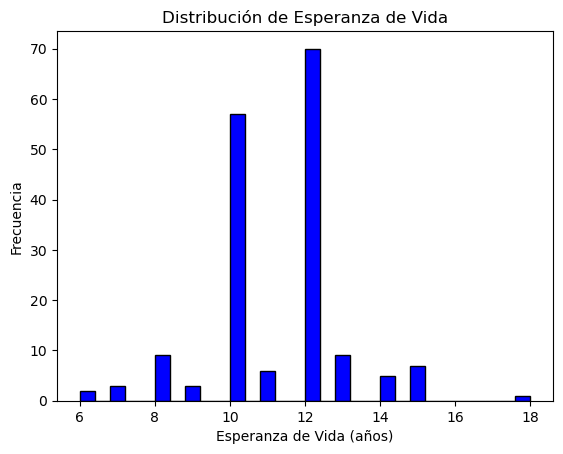

In [18]:
plt.hist(df['life_span'], bins=30, color='blue', edgecolor='black')
plt.title('Distribución de Esperanza de Vida')
plt.xlabel('Esperanza de Vida (años)')
plt.ylabel('Frecuencia')
plt.show()

RESPUESTA: 12 años es la esperanza de vida más frecuente

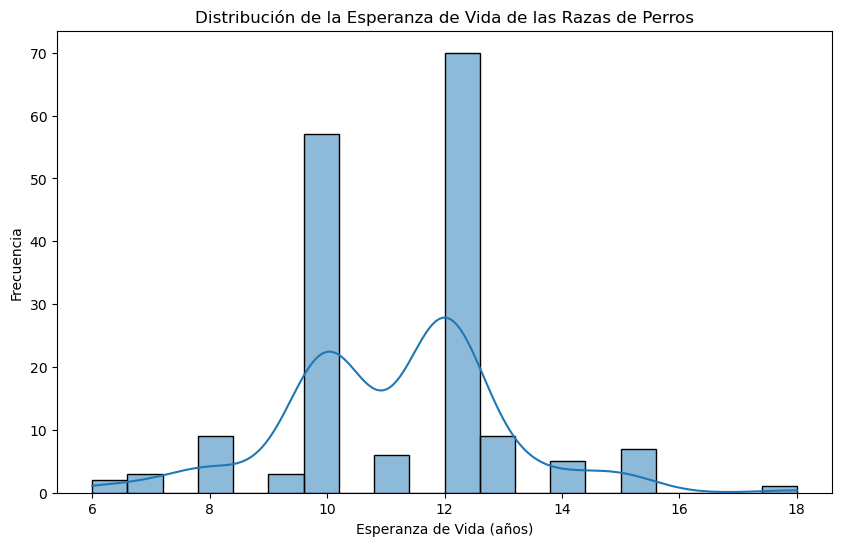

In [32]:
# crear un histograma sobre la distribución de la esperanza de Vida por raza
plt.figure(figsize=(10, 6))
sns.histplot(df['life_span'], kde=True, bins=20)
plt.title('Distribución de la Esperanza de Vida de las Razas de Perros')
plt.xlabel('Esperanza de Vida (años)')
plt.ylabel('Frecuencia');

#### ¿Cuál es el temperamento más frecuente entre todas las razas de perros?

C:\Users\KeythiCL\AppData\Local\Temp\ipykernel_10916\1965731351.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


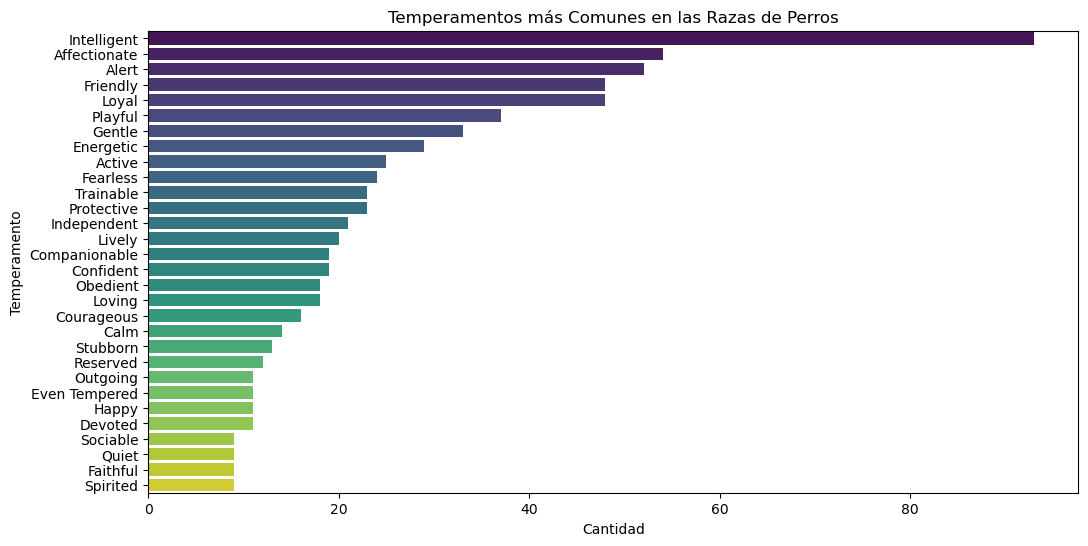

In [34]:
# Dividir los temperamentos en una lista de palabras
lista_temperamentos = df['temperament'].dropna().str.split(', ')
temperamentos = []
for sublista in lista_temperamentos:
    for temperamento in sublista:
        temperamentos.append(temperamento)

# Contar los temperamentos usando pandas
serie_temperamentos = pd.Series(temperamentos)
conteo_temperamentos = serie_temperamentos.value_counts().head(30).reset_index()
conteo_temperamentos.columns = ['Temperamento', 'Conteo']

# Graficar los temperamentos más comunes con colores
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Conteo', 
    y='Temperamento', 
    data=conteo_temperamentos, 
    palette='viridis'  # Aquí agregas los colores
)
plt.title('Temperamentos más Comunes en las Razas de Perros')
plt.xlabel('Cantidad')
plt.ylabel('Temperamento')
plt.show()


RESPUESTA: Inteligente es el tipo de temperamento más frecuente